In [24]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(3)
%matplotlib inline

In [25]:
# 分离数据集
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_val=x_train[50000:]
y_val=y_train[50000:]
x_train=x_train[:50000]
y_train=y_train[:50000]

In [26]:
# 值归一
x_train=x_train.reshape(50000, 784).astype('float32')/255
x_val=x_val.reshape(10000,784).astype('float32')/255
x_test=x_test.reshape(10000, 784).astype('float32')/255

In [27]:
# 多值变哑变量矩阵
y_train=np_utils.to_categorical(y_train)
y_val=np_utils.to_categorical(y_val)
y_test=np_utils.to_categorical(y_test)

In [28]:
# 抽选部分数据
train_rand_idxs=np.random.choice(50000, 700)
val_rand_idxs=np.random.choice(10000, 300)
x_train=x_train[train_rand_idxs]
y_train=y_train[train_rand_idxs]
x_val=x_val[val_rand_idxs]
y_val=y_val[val_rand_idxs]

In [29]:
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
hist=model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 700 samples, validate on 300 samples
Epoch 1/1000
700/700 [==============================] - 2s 3ms/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/1000
700/700 [==============================] - 0s 470us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/1000
700/700 [==============================] - 0s 458us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/1000
700/700 [==============================] - 0s 556us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/1000
700/700 [==============================] - 0s 456us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/1000
700/700 [==============================] - 0s 490us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/1000
700/700 [=======================

In [18]:
loss_and_metrics=model.evaluate(x_test, y_test, batch_size=32)
print('loss and metrics:'+str(loss_and_metrics))

10000/10000 [==============================] - 0s 50us/step
loss and metrics:[2.25819593334198, 0.2657]


In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

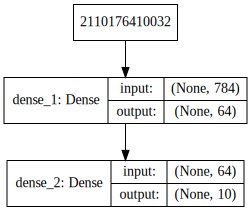

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model=load_model('mnist_mlp_model.h5')

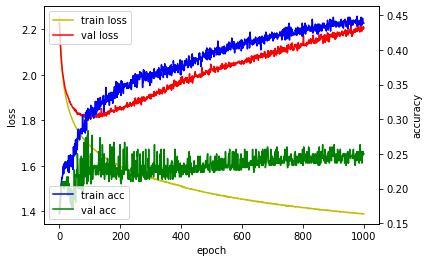

In [21]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

In [22]:
# 使用tensorboard
import keras
tb_hist=keras.callbacks.TensorBoard(log_dir='./graph', histogram_freq=0, write_graph=True, write_images=True)
model.fit(x_train, y_train, epochs=1000, batch_size=10, validation_data=(x_val, y_val), callbacks=[tb_hist])
# 命令行tensorboard --logdir=D:\Projects\python_projects\DA_and_ML\graph --host=127.0.0.1

Train on 700 samples, validate on 300 samples


Epoch 1/1000
700/700 [==============================] - 0s 594us/step - loss: 1.3879 - acc: 0.4400 - val_loss: 2.2093 - val_acc: 0.2400
Epoch 2/1000
700/700 [==============================] - 0s 494us/step - loss: 1.3880 - acc: 0.4400 - val_loss: 2.2086 - val_acc: 0.2533
Epoch 3/1000
700/700 [==============================] - 0s 550us/step - loss: 1.3865 - acc: 0.4457 - val_loss: 2.2155 - val_acc: 0.2567
Epoch 4/1000
700/700 [==============================] - 0s 486us/step - loss: 1.3869 - acc: 0.4386 - val_loss: 2.2161 - val_acc: 0.2433
Epoch 5/1000
700/700 [==============================] - 0s 443us/step - loss: 1.3867 - acc: 0.4457 - val_loss: 2.2102 - val_acc: 0.2333
Epoch 6/1000
700/700 [==============================] - 0s 526us/step - loss: 1.3870 - acc: 0.4414 - val_loss: 2.2145 - val_acc: 0.2567
Epoch 7/1000
700/700 [==============================] - 0s 490us/step - loss: 1.3871 - acc: 0.4386 - val_loss: 2.2068 - val_acc: 0.2533


In [33]:
# 早停
from keras.callbacks import EarlyStopping
es=EarlyStopping(monitor='val_loss', min_delta=0, patience=30, verbose=0, mode='auto')
es_hist=model.fit(x_train, y_train, epochs=3000, batch_size=10, validation_data=(x_val, y_val), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 1s 783us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
Epoch 2/3000
700/700 [==============================] - 0s 518us/step - loss: 2.2072 - acc: 0.1657 - val_loss: 2.1908 - val_acc: 0.1800
Epoch 3/3000
700/700 [==============================] - 0s 526us/step - loss: 2.1730 - acc: 0.1729 - val_loss: 2.1631 - val_acc: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 452us/step - loss: 2.1441 - acc: 0.1786 - val_loss: 2.1372 - val_acc: 0.1867
Epoch 5/3000
700/700 [==============================] - 0s 556us/step - loss: 2.1177 - acc: 0.1900 - val_loss: 2.1141 - val_acc: 0.1867
Epoch 6/3000
700/700 [==============================] - 0s 484us/step - loss: 2.0940 - acc: 0.2029 - val_loss: 2.0931 - val_acc: 0.2033
Epoch 7/3000
700/700 [==============================] - 0s 452us/step - loss: 2.0721 - acc: 0.2071 - val_loss: 2.0727 - val_acc: 0.2067
Ep

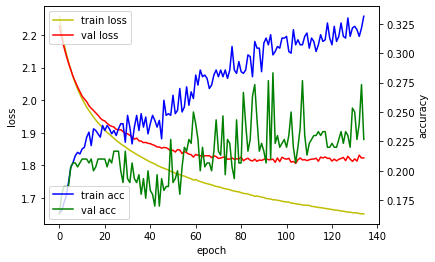

In [34]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
 
loss_ax.plot(es_hist.history['loss'], 'y', label='train loss')
loss_ax.plot(es_hist.history['val_loss'], 'r', label='val loss')
 
acc_ax.plot(es_hist.history['acc'], 'b', label='train acc')
acc_ax.plot(es_hist.history['val_acc'], 'g', label='val acc')
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')